In [ ]:
!pip install -qU camelot-py
!pip install -qU PyPDF2 openpyxl pdfplumber

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 4.6 MB/s eta 0:00:00


In [ ]:
import camelot
import pandas as pd
from PyPDF2 import PdfReader


# **BESTCOMPANYTY24 Processing steps**

In [ ]:
pdf_2_path = "/content/page_2.pdf"
pdf_3_path = "/content/page_3.pdf"

In [ ]:
tables_2 = camelot.read_pdf(pdf_2_path, pages="1", flavor="stream")

In [ ]:
print(tables_2[0].parsing_report)

{'accuracy': 99.54, 'whitespace': 51.58, 'order': 1, 'page': 1}


In [ ]:
df = tables_2[0].df
df.head()

,0,1,2,3,4
0,Account name:,BEST 1 COMPANY PTY LTD,,,
1,Account number:,443210631997,,,
2,Date,Transaction Detail,Debit,Credit,Balance
3,14/06/2024,POS 14533300 14 JUN,,799.85,"73,431.04"
4,14/06/2024,TAX OFFICE PAYMENTS,"13,546.00",,"72,631.19"


In [ ]:
df_1 = df.drop(index=[0,1]).reset_index(drop=True)

In [ ]:
df_1.head()

,0,1,2,3,4
0,Date,Transaction Detail,Debit,Credit,Balance
1,14/06/2024,POS 14533300 14 JUN,,799.85,"73,431.04"
2,14/06/2024,TAX OFFICE PAYMENTS,"13,546.00",,"72,631.19"
3,,CommBank app BPAY 75,,,
4,,2166130694082060 Mar,,,


In [ ]:
df_1.columns = df_1.iloc[0]
df_1 = df_1.drop(index=0)

In [ ]:
df_1.reset_index(drop=True)

,Date,Transaction Detail,Debit,Credit,Balance
0,14/06/2024,POS 14533300 14 JUN,,799.85,"73,431.04"
1,14/06/2024,TAX OFFICE PAYMENTS,"13,546.00",,"72,631.19"
2,,CommBank app BPAY 75,,,
3,,2166130694082060 Mar,,,
4,,24 quarter,,,
5,14/06/2024,TAX OFFICE PAYMENTS,"12,088.00",,"86,177.19"
6,,CommBank app BPAY 75,,,
7,,2166130694082060 Dec,,,
8,,23 quarter,,,
9,13/06/2024,POS 14533300 13 JUN,,"1,234.33","98,265.19"


In [ ]:
rows = []
current = None

for _, row in df_1.iterrows():
    if pd.notna(row["Date"]) and row["Date"] != "":
        if current is not None:
            rows.append(current)
        current = row.copy()
    else:
        current["Transaction Detail"] += " " + str(row["Transaction Detail"])
if current is not None:
    rows.append(current)

clean_df = pd.DataFrame(rows)
clean_df.head()

,Date,Transaction Detail,Debit,Credit,Balance
1,14/06/2024,POS 14533300 14 JUN,,799.85,"73,431.04"
2,14/06/2024,TAX OFFICE PAYMENTS CommBank app BPAY 75 21661...,"13,546.00",,"72,631.19"
6,14/06/2024,TAX OFFICE PAYMENTS CommBank app BPAY 75 21661...,"12,088.00",,"86,177.19"
10,13/06/2024,POS 14533300 13 JUN,,"1,234.33","98,265.19"
11,12/06/2024,POS 14533300 12 JUN,,"1,381.64","97,030.86"


In [ ]:
clean_df.to_csv("page_2.csv", index=False)

In [ ]:
df

,Date,Transaction Detail,Debit,Credit,Balance
0,14/06/2024,TAX OFFICE PAYMENTS,"13,546.00",,"72,631.19"
1,,CommBank app BPAY 75,,,
2,,2166130694082060 Mar,,,
3,,24 quarter,,,
4,14/06/2024,TAX OFFICE PAYMENTS,"12,088.00",,"86,177.19"


In [ ]:
def clean_df(df):
  df = df.drop(index=[0,1]).reset_index(drop=True)
  df.columns = df.iloc[0]
  df = df.drop(index=0).reset_index(drop=True)

  rows=[]
  current=None
  for _, row in df.iterrows():
    if pd.notna(row["Date"]) and row["Date"] != "":
      if current is not None:
        rows.append(current)
      current = row.copy()
    else:
      current["Transaction Detail"] += " "+str(row["Transaction Detail"])

  if current is not None:
    rows.append(current)

  cleandf = pd.DataFrame(rows)
  return cleandf

In [ ]:
raw_df = tables_2[0].df

In [ ]:
processed_df = clean_df(raw_df)

In [ ]:
processed_df.head()

,Date,Transaction Detail,Debit,Credit,Balance
0,14/06/2024,POS 14533300 14 JUN,,799.85,"73,431.04"
1,14/06/2024,TAX OFFICE PAYMENTS CommBank app BPAY 75 21661...,"13,546.00",,"72,631.19"
5,14/06/2024,TAX OFFICE PAYMENTS CommBank app BPAY 75 21661...,"12,088.00",,"86,177.19"
9,13/06/2024,POS 14533300 13 JUN,,"1,234.33","98,265.19"
10,12/06/2024,POS 14533300 12 JUN,,"1,381.64","97,030.86"


# **Final Processing Pipeline for BESTCOMPANYTY24.pdf file**

In [ ]:
pdf_doc_path = "/content/BESTCOMPANYTY24.pdf"

In [ ]:
class Process:
  def __init__(self, pdf_path):
    self.pdf_path = pdf_path
    self.reader = PdfReader(pdf_path)
    self.num_pages = len(self.reader.pages)

  def clean_df(self, df):
      df = df.drop(index=[0,1]).reset_index(drop=True)
      df.columns = df.iloc[0]
      df = df.drop(index=0).reset_index(drop=True)
      rows=[]
      current=None
      for _, row in df.iterrows():
        if pd.notna(row["Date"]) and row["Date"] != "":
          if current is not None:
            rows.append(current)
          current = row.copy()
        else:
          current["Transaction Detail"] += " "+str(row["Transaction Detail"])

      if current is not None:
        rows.append(current)

      cleandf = pd.DataFrame(rows)
      cleandf = cleandf[cleandf["Credit"]!="Page number"]
      return cleandf

  def get_tables(self):
    all_tables = []
    for page_no in range(1, self.num_pages+1):
      tables = camelot.read_pdf(self.pdf_path, pages=str(page_no), flavor="lattice")
      if len(tables)==0:
        tables = camelot.read_pdf(self.pdf_path, pages=str(page_no), flavor="stream")
      for table in tables:
        df = table.df
        all_tables.append(self.clean_df(df))
    return all_tables

  def save_file(self, all_tables):
    pd.concat(all_tables, ignore_index=True).to_csv("output.csv", index=False)

  def run(self):
    print("Procesing the pdf file")
    alltables=self.get_tables()
    print("Saving the file")
    self.save_file(alltables)
    print("Done")

In [ ]:
a = Process(pdf_doc_path)
a.run()

Procesing the pdf file
Saving the file
Done


# **Statement20230930 (3)**

In [ ]:
pdf_1_path = "/content/page_1.pdf"
pdf_2_path = "/content/page_2.pdf"
pdf_3_path = "/content/page_3.pdf"
pdf_4_path = "/content/page_4.pdf"
pdf_doc_path = "/content/Statement20230930 (3).pdf"

In [ ]:
tables= camelot.read_pdf(pdf_1_path, pages="1", flavor="stream")
for i in range(len(tables)):
  print(f"Table {i}: {tables[i].parsing_report}")

Table 0: {'accuracy': 100.0, 'whitespace': 66.67, 'order': 1, 'page': 1}
Table 1: {'accuracy': 76.95, 'whitespace': 36.36, 'order': 2, 'page': 1}
Table 2: {'accuracy': 95.22, 'whitespace': 40.0, 'order': 3, 'page': 1}


In [ ]:
tables

<TableList n=3>

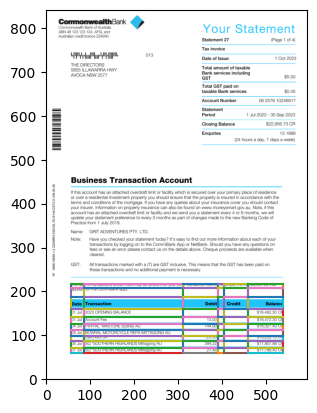

In [ ]:
camelot.plot(tables[2], kind='grid').show()

In [ ]:
import camelot

types = ["stream", "network"]

for i in types:
    print(f"Processing {i}")
    tables = camelot.read_pdf(pdf_doc_path, pages="all", flavor=i)
    acc_sum = 0
    if tables:
        for table in tables:
            acc_sum += table.parsing_report["accuracy"]
        average_accuracy = acc_sum / len(tables)
        print(f"Average accuracy score for {i} in extracting tables: {average_accuracy:.2f}")
    else:
        print(f"No tables found for {i}.")


Processing stream
Average accuracy score for stream in extracting tables: 94.65
Processing network
Average accuracy score for network in extracting tables: 95.33


In [ ]:
len(tables)

7

In [ ]:
tables = camelot.read_pdf(pdf_doc_path,
                          pages="all",
                          flavor="network",
                          split_text=True,
                          edge_tol=200,
                          row_tol=10
                         # split_text=True,
                         # columns=['72,95'],
                      )

# Date = 60
# Transaction= 91.2
# Debit= 363.84
# Credit= 412.8
# Balance = 501.12

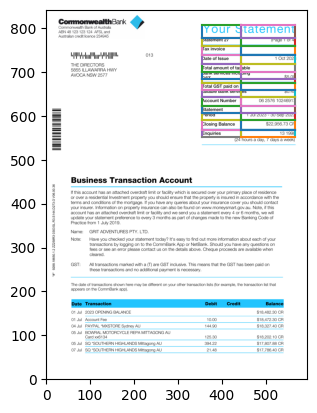

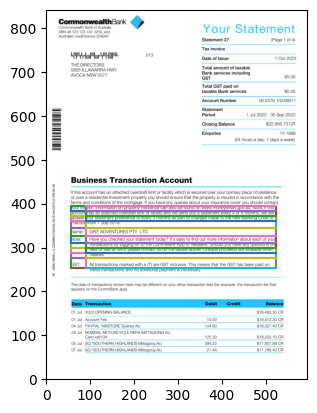

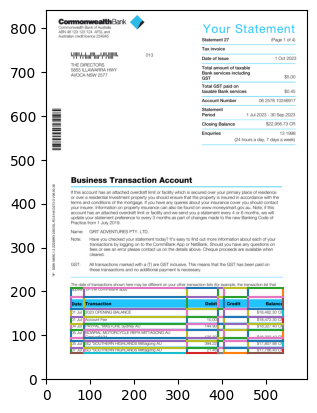

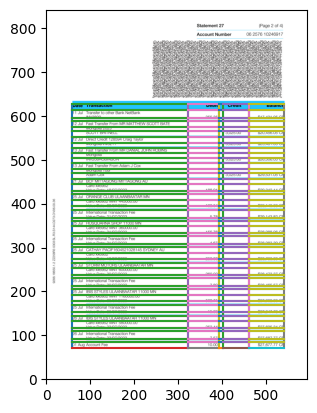

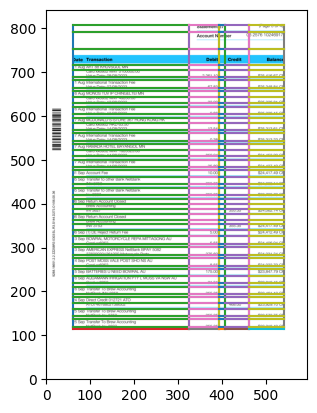

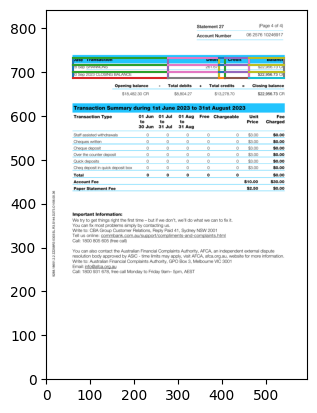

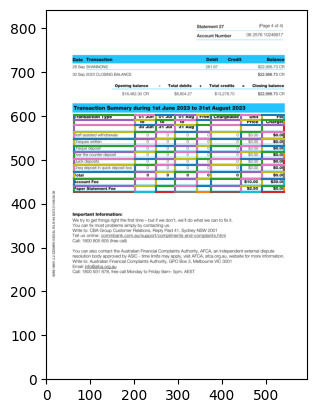

In [ ]:
for i in range(len(tables)):
  camelot.plot(tables[i], kind='grid').show()

In [ ]:
tables_actual = tables[2:6]

In [ ]:
len(tables_actual)

4

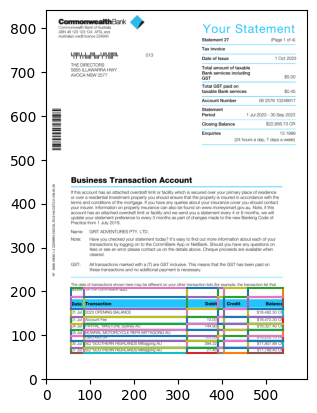

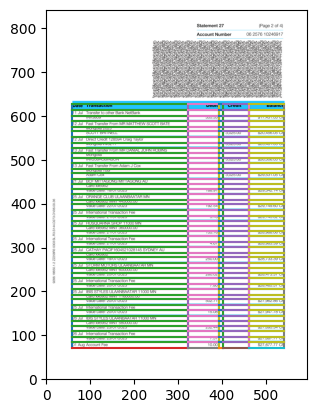

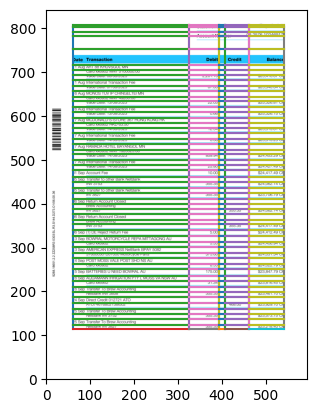

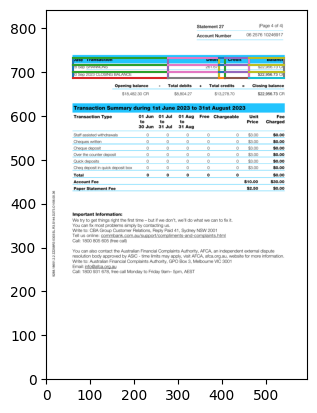

In [ ]:
for i in range(len(tables_actual)):
  camelot.plot(tables_actual[i], kind='grid').show()

In [ ]:
tables_actual[0].df.head(10)

,0,1,2,3,4,5
0,appear,s on the CommBank app).,,,,
1,Date,Transaction,Debit,,Credit,Balance
2,01 Jul,2023 OPENING BALANCE,,,,"$18,482.30 CR"
3,01 Jul,Account Fee,10.00,$,,"$18,472.30 CR"
4,04 Jul,PAYPAL *MXSTORE Sydney AU,144.90,$,,"$18,327.40 CR"
5,05 Jul,BOWRAL MOTORCYCLE REPA MITTAGONG AU,,,,
6,,Card xx6134,125.30,$,,"$18,202.10 CR"
7,05 Jul,SQ *SOUTHERN HIGHLANDS Mittagong AU,394.22,$,,"$17,807.88 CR"
8,07 Jul,SQ *SOUTHERN HIGHLANDS Mittagong AU,21.48,$,,"$17,786.40 CR"


In [ ]:
tables_actual[1].df.head(10)

,0,1,2,3,4
0,Transaction\nDate,Debit,,Credit,Balance
1,11 Jul\nTransfer to other Bank NetBank,,,,
2,INV3809,355.35,$,,"$17,431.05 CR"
3,12 Jul\nFast Transfer From MR MATTHEW SCOTT BATE,,,,
4,Mongolia 2023,,,,
5,SCOTT BRITNELL,,,"$3,025.00","$20,456.05 CR"
6,12 Jul\nDirect Credit 128594 Craig Taylor,,,,
7,Mongolia inv0211,,,"$3,025.00","$23,481.05 CR"
8,13 Jul\nFast Transfer From MR DANIAL JOHN ROBINS,,,,
9,Mongolia,,,,


In [ ]:
tables_actual[2].df.head(10)

,0,1,2,3,4
0,,,,,(Page 3 of 4)
1,,Statement,27,,
2,,,,0,6 2576 10246917
3,,Account Nu,m,ber,
4,Transaction\nDate,Debit,,Credit,Balance
5,11 Aug ART 88 KHUVSGUL MN,,,,
6,Card xx6952 MNT 5100000.00,,,,
7,Value Date: 08/08/2023,"2,261.10",$,,"$25,416.67 CR"
8,11 Aug International Transaction Fee,,,,
9,Value Date: 07/08/2023,67.83,$,,"$25,348.84 CR"


In [ ]:
df = tables_actual[1].df.head(10)

,0,1,2,3,4
0,Transaction\nDate,Debit,,Credit,Balance
1,11 Jul\nTransfer to other Bank NetBank,,,,
2,INV3809,355.35,$,,"$17,431.05 CR"
3,12 Jul\nFast Transfer From MR MATTHEW SCOTT BATE,,,,
4,Mongolia 2023,,,,


In [ ]:
for i, row in df.iterrows():
    if row.astype(str).str.contains('Transaction').any():
        df.columns = df.iloc[i]
        df = df.iloc[i+1:].reset_index(drop=True)
        break

if list(df.columns)==["Date", "Transaction", "Debit", "Credit", "Balance"]:
  print("yes")
  is_1="Yes"
else:
  print("No")
  is_1="No"

if is_1=="Yes":
  rows=[]
  current=None
  for _, row in df.iterrows():
    if pd.notna(row["Date"]) and row["Date"] != "":
      if current is not None:
        rows.append(current)
      current = row.copy()
    else:
      current["Transaction"] += " "+str(row["Transaction"])
      current["Debit"]+= " "+str(row["Debit"])
      current["Credit"]+= " "+str(row["Credit"])
      current["Balance"]+= " "+str(row["Balance"])

  if current is not None:
    rows.append(current)

  cleandf = pd.DataFrame(rows)
  cleandf = cleandf[cleandf["Credit"]!="Page number"]
  cleandf.drop(columns=[""],axis=1,inplace=True)
else:
  if df.columns[0]==""






No


In [ ]:
for i, row in df.iterrows():
    if row.astype(str).str.contains('Transaction').any():
        df.columns = df.iloc[i]
        df = df.iloc[i+1:].reset_index(drop=True)
        break

rows=[]
current=None
for _, row in df.iterrows():
  if pd.notna(row["Date"]) and row["Date"] != "":
    if current is not None:
      rows.append(current)
    current = row.copy()
  else:
    current["Transaction"] += " "+str(row["Transaction"])
    current["Debit"]+= " "+str(row["Debit"])
    current["Credit"]+= " "+str(row["Credit"])
    current["Balance"]+= " "+str(row["Balance"])

if current is not None:
  rows.append(current)

cleandf = pd.DataFrame(rows)
cleandf = cleandf[cleandf["Credit"]!="Page number"]
cleandf.drop(columns=[""],axis=1,inplace=True)

In [ ]:
df.head()

1,Date,Transaction,Debit,,Credit,Balance
0,01 Jul,2023 OPENING BALANCE,,,,"$18,482.30 CR"
1,01 Jul,Account Fee,10.00,$,,"$18,472.30 CR"
2,04 Jul,PAYPAL *MXSTORE Sydney AU,144.90,$,,"$18,327.40 CR"
3,05 Jul,BOWRAL MOTORCYCLE REPA MITTAGONG AU,,,,
4,,Card xx6134,125.30,$,,"$18,202.10 CR"


In [ ]:
cleandf.head()

1,Date,Transaction,Debit,Credit,Balance
0,01 Jul,2023 OPENING BALANCE,,,"$18,482.30 CR"
1,01 Jul,Account Fee,10.00,,"$18,472.30 CR"
2,04 Jul,PAYPAL *MXSTORE Sydney AU,144.90,,"$18,327.40 CR"
3,05 Jul,BOWRAL MOTORCYCLE REPA MITTAGONG AU Card xx6134,125.30,,"$18,202.10 CR"
5,05 Jul,SQ *SOUTHERN HIGHLANDS Mittagong AU,394.22,,"$17,807.88 CR"


In [ ]:
cleandf.columns

Index(['Date', 'Transaction', 'Debit', '', 'Credit', 'Balance'], dtype='object', name=1)

In [ ]:
class Process:
  def __init__(self, pdf_path):
    self.pdf_path = pdf_path
    self.reader = PdfReader(pdf_path)
    self.num_pages = len(self.reader.pages)

  def clean_df(self, df):
    for i, row in df.iterrows():
        if row.astype(str).str.contains('Transaction').any():
            df.columns = df.iloc[i]
            df = df.iloc[i+1:].reset_index(drop=True)
            break
    rows=[]
    current=None
    for _, row in df.iterrows():
      if pd.notna(row["Date"]) and row["Date"] != "":
        if current is not None:
          rows.append(current)
        current = row.copy()
      else:
        current["Transaction"] += " "+str(row["Transaction"])
        current["Debit"]+= " "+str(row["Debit"])
        current["Credit"]+= " "+str(row["Credit"])
        current["Balance"]+= " "+str(row["Balance"])

    if current is not None:
      rows.append(current)

    cleandf = pd.DataFrame(rows)
    cleandf = cleandf[cleandf["Credit"]!="Page number"]
    cleandf.drop(columns=[""],axis=1,inplace=True)
    return cleandf

  def get_tables(self):
    all_tables = []
    for page_no in range(1, self.num_pages+1):
      tables = camelot.read_pdf(self.pdf_path, pages=str(page_no), flavor="lattice")
      if len(tables)==0:
        tables = camelot.read_pdf(self.pdf_path, pages=str(page_no), flavor="network")
      for table in tables:
        df = table.df
        all_tables.append(self.clean_df(df))
    return all_tables

  def save_file(self, all_tables):
    pd.concat(all_tables, ignore_index=True).to_csv("output.csv", index=False)

  def run(self):
    print("Procesing the pdf file")
    alltables=self.get_tables()
    print("Saving the file")
    self.save_file(alltables)
    print("Done")

In [ ]:
a = Process(pdf_doc_path)
a.run()

Procesing the pdf file


KeyError: 'Date'